## importing the modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 

from sklearn.impute import SimpleImputer

import plotly.express as pl
import plotly.io as pio

import bar_chart_race as bcr

pio.renderers.default = 'iframe'

## importing the data

In [2]:
df = pd.read_csv(r"C:\Users\JAWAHAR JOVAH\Downloads\dataset.csv")

In [3]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [4]:
df.shape

(112634, 17)

### Simple imputer for replacing the numerical missing values

In [5]:
SI = SimpleImputer()

In [75]:
df["Legislative District"] = SI.fit_transform(df[["Legislative District"]])


## Mode simple imputer

In [7]:
mode_si = SimpleImputer(strategy="most_frequent")

In [8]:
volvo_mask = df["Make"] == "VOLVO"

In [9]:
df.loc[volvo_mask,"Model"]= mode_si.fit_transform(df.loc[volvo_mask,["Model"]])

In [10]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                   0
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [11]:
df.fillna("unknown",inplace=True)
df.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

## univariate analysis

In [12]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [13]:
int_col =  list(filter(lambda x: df[x].dtype == np.int64 , df.columns))

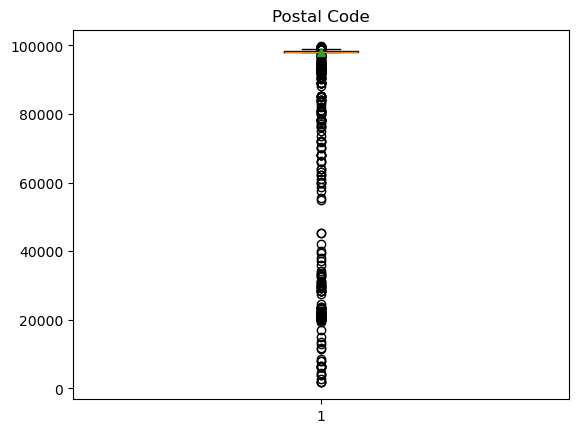

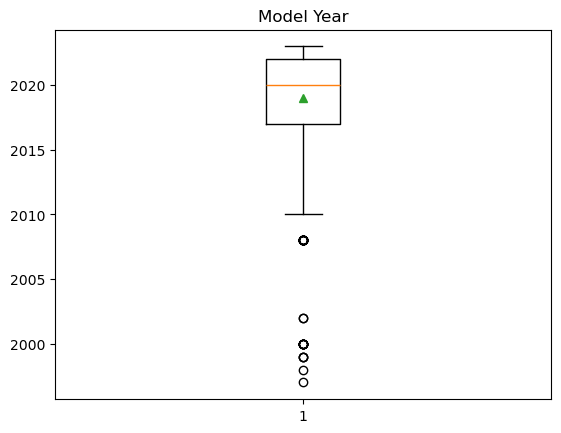

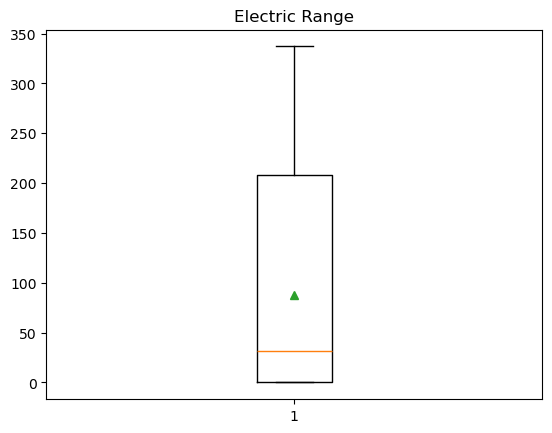

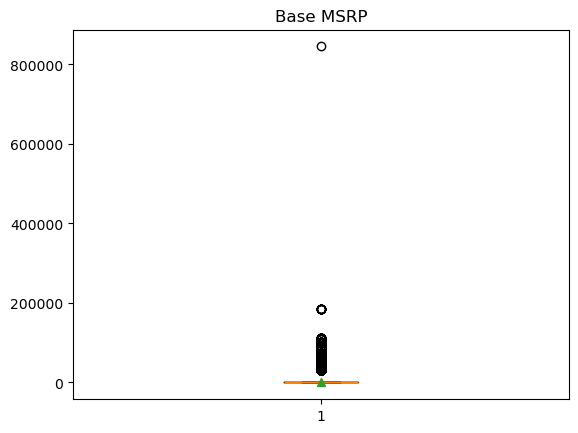

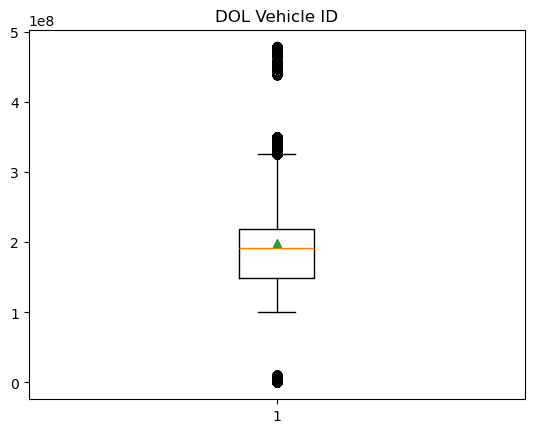

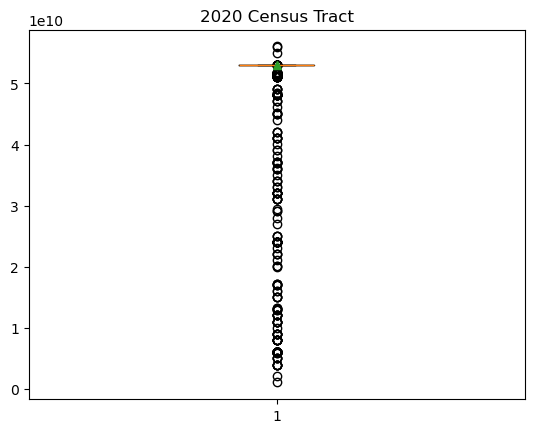

In [14]:
for i in int_col:
    plt.title(i)
    plt.boxplot(df[i],showmeans=True)
    plt.show()

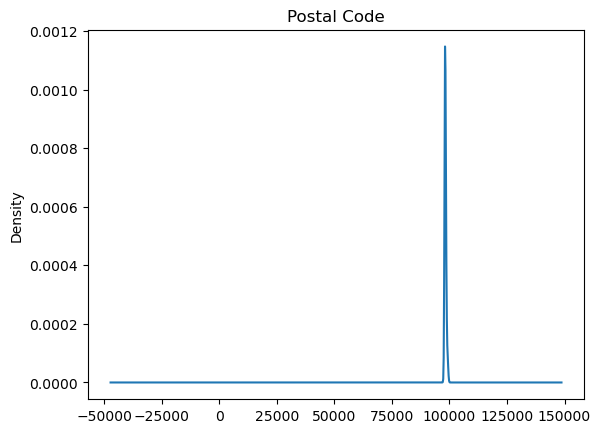

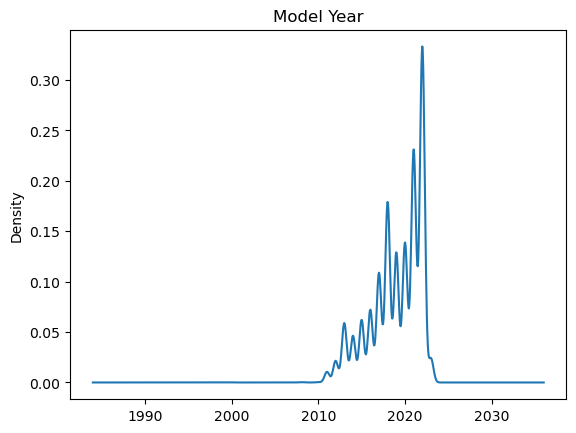

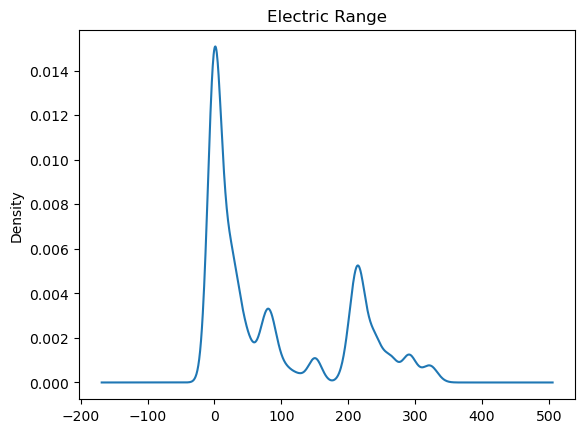

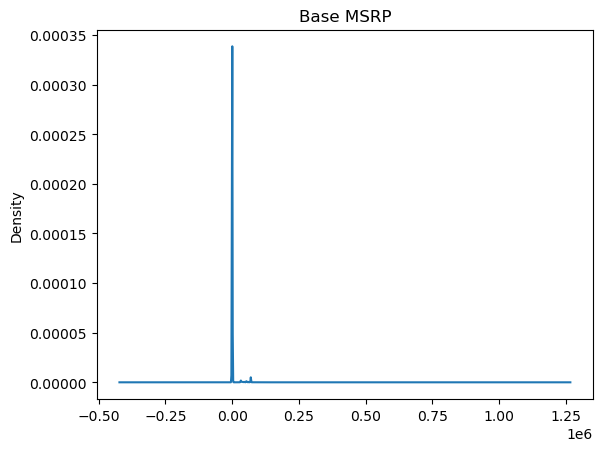

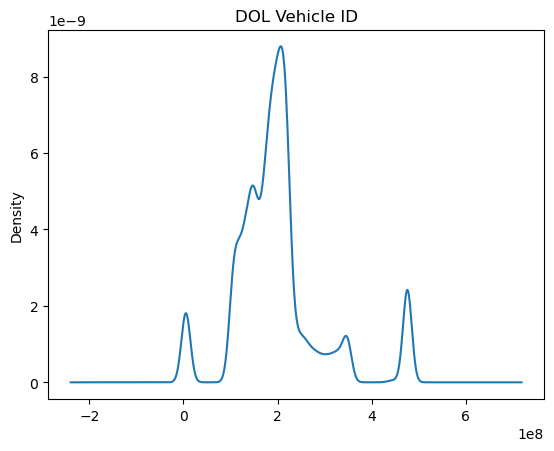

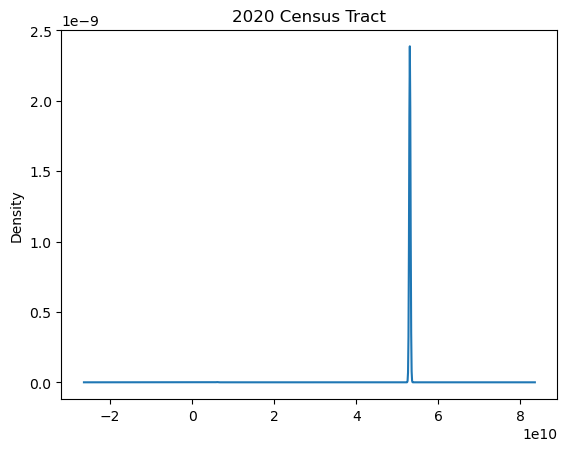

In [15]:
for i in int_col:
    plt.title(i)
    df[i].plot(kind="kde")
    plt.show()

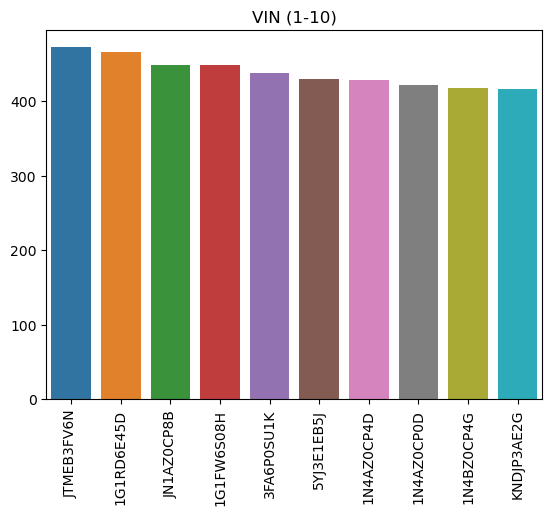

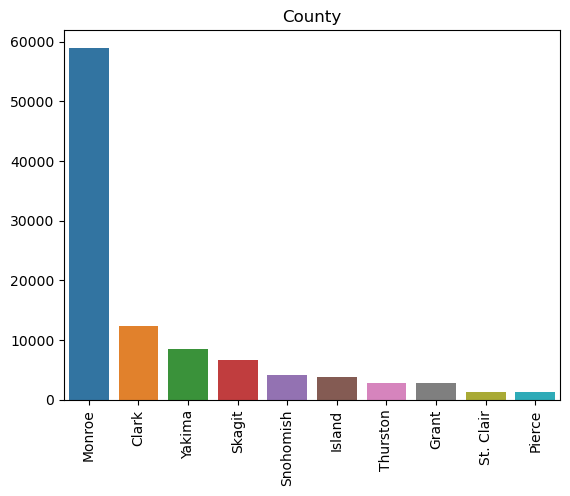

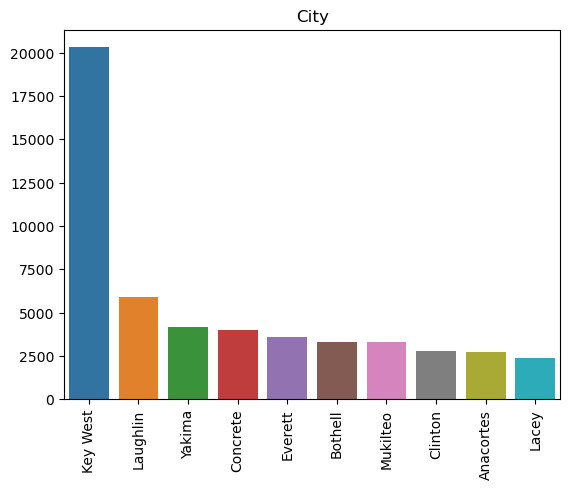

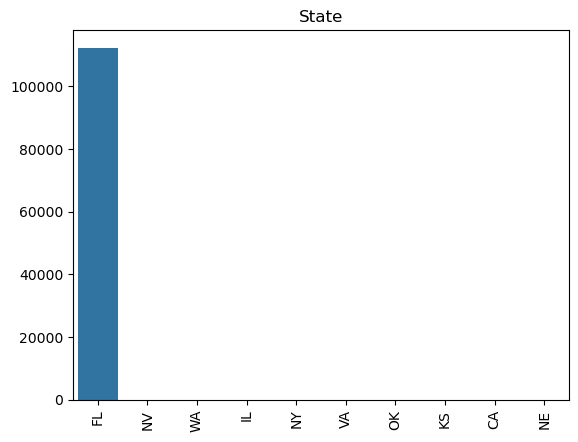

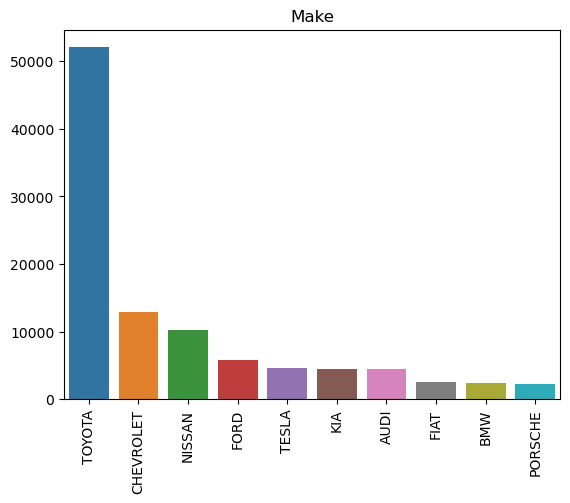

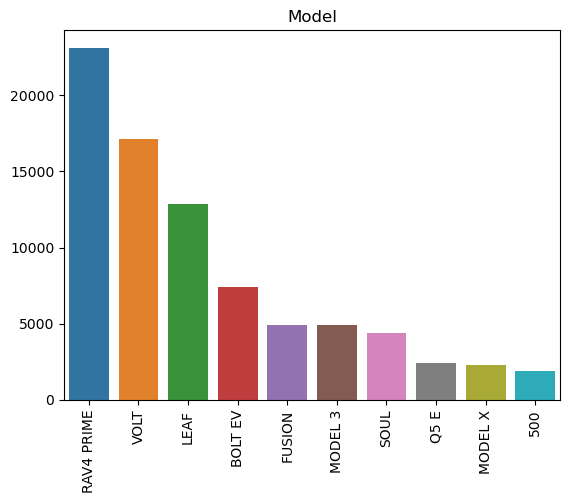

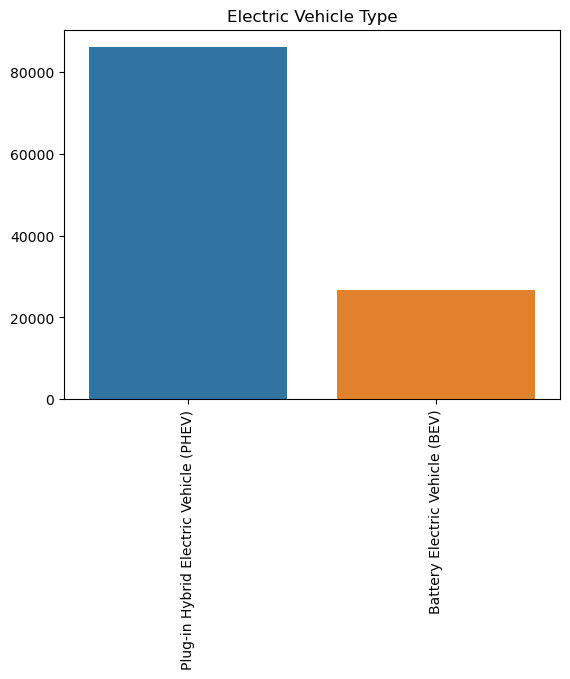

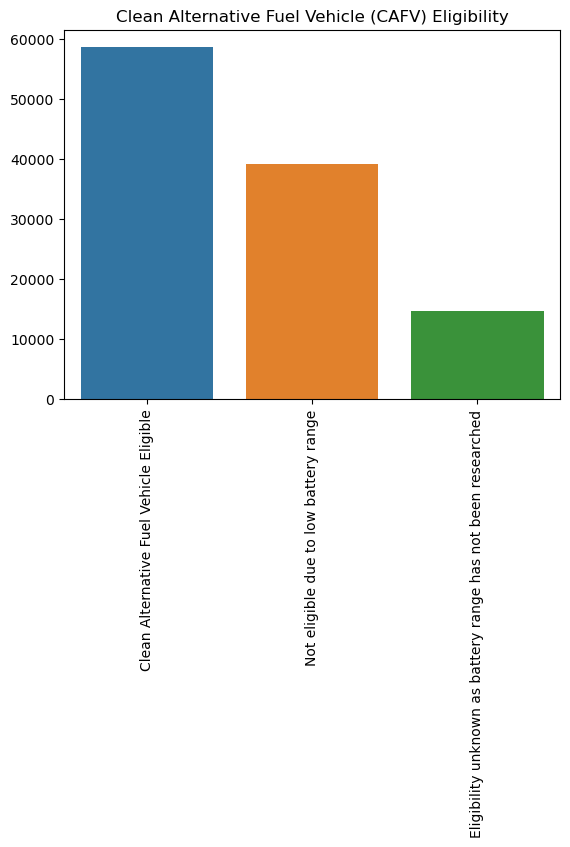

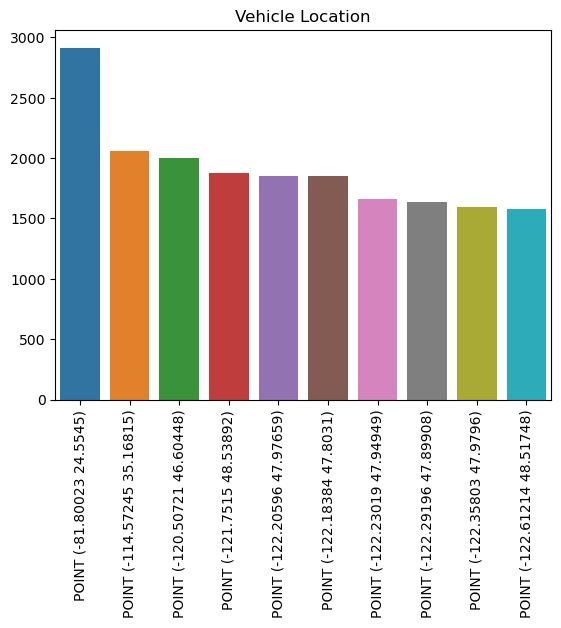

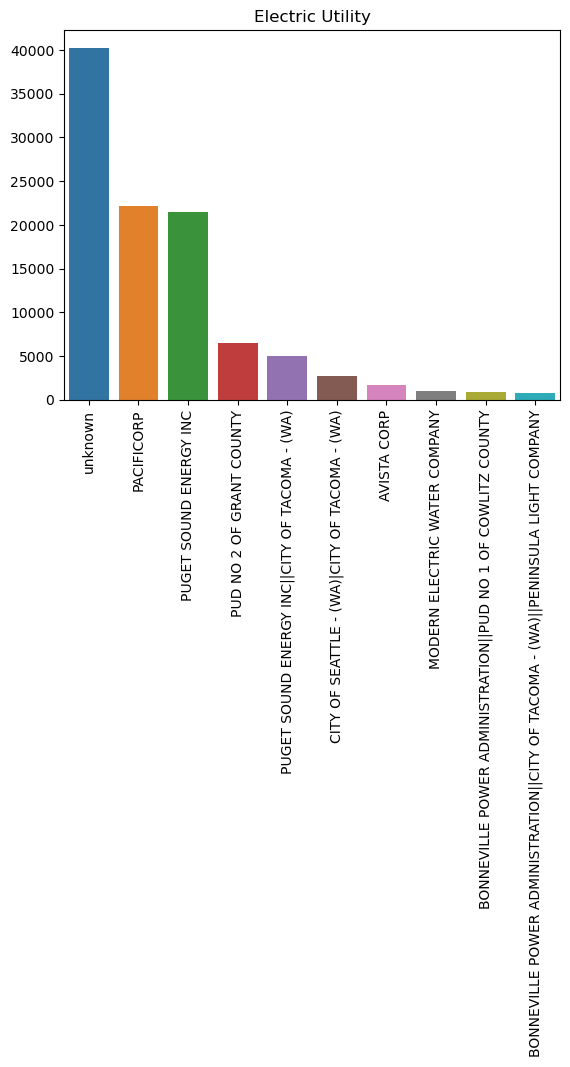

In [16]:
for i in df.columns:
    if df[i].dtype == np.object_:
        plt.title(i)
        sns.barplot(x = df[i].unique()[:10],y = np.array(df[i].value_counts()[:10]),hue = df[i].unique()[:10])
        plt.xticks(rotation=90)
        plt.show()

## Numerical data vs Numerical data

## Relation between numerical columns:-

<Axes: >

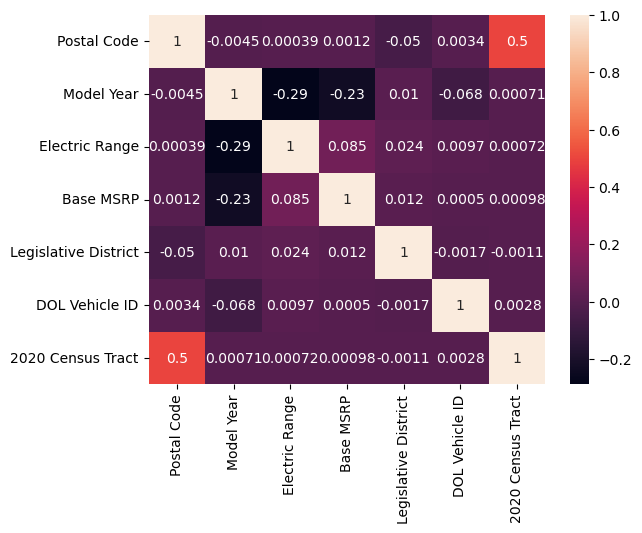

In [17]:
sns.heatmap(
    df.corr(
        numeric_only=True
    ),
    annot=True
)

### relation between model year and electric range :-

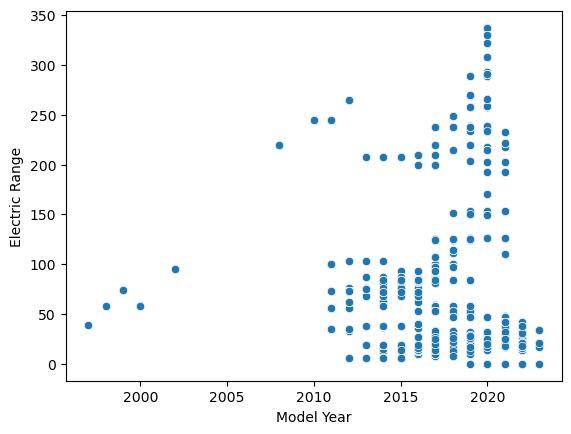

In [18]:
sns.scatterplot(df,x="Model Year",y="Electric Range")
plt.show()

### relation between base MSRP and Electric Range of the vehicle :-

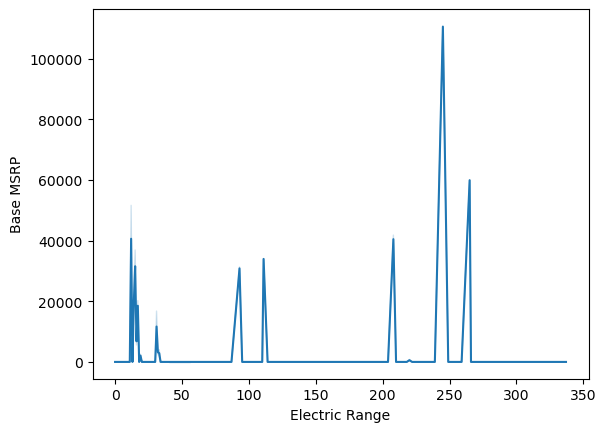

In [19]:
sns.lineplot(df,x='Electric Range',y='Base MSRP',estimator='mean')
plt.show()

### Relation between model year and Base MSRP :-

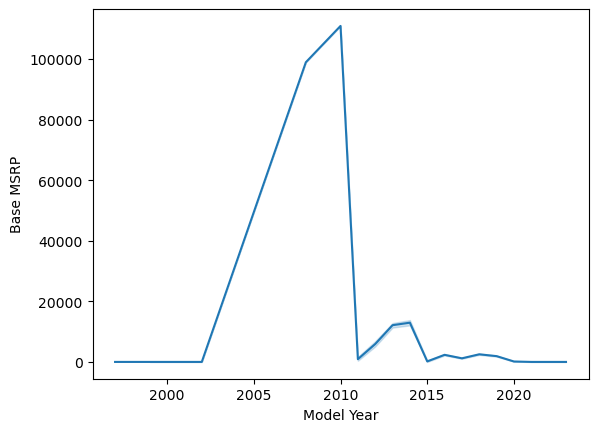

In [20]:
sns.lineplot(df,x='Model Year',y='Base MSRP',estimator='mean')
plt.show()

## categorical data vs Numerical data

## Relationship between numerical and categorical columns

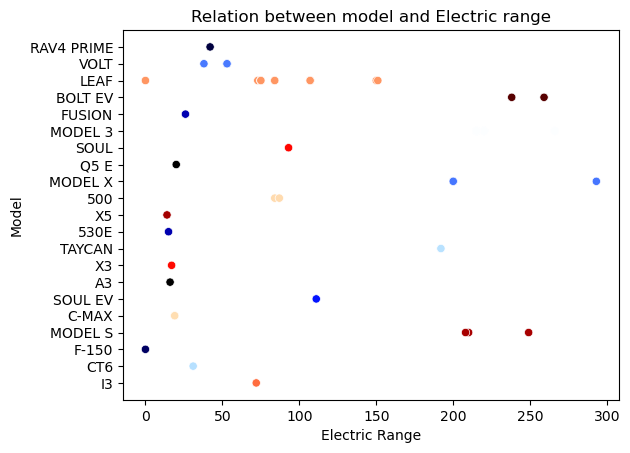

In [21]:
plt.title(
    "Relation between model and Electric range"
)
sns.scatterplot(
    df,
    x = df["Electric Range"],
    y = df.Model[:50],
    hue = df.Model[:50],
    legend = False,
    palette = "flag",
    
)
plt.show()

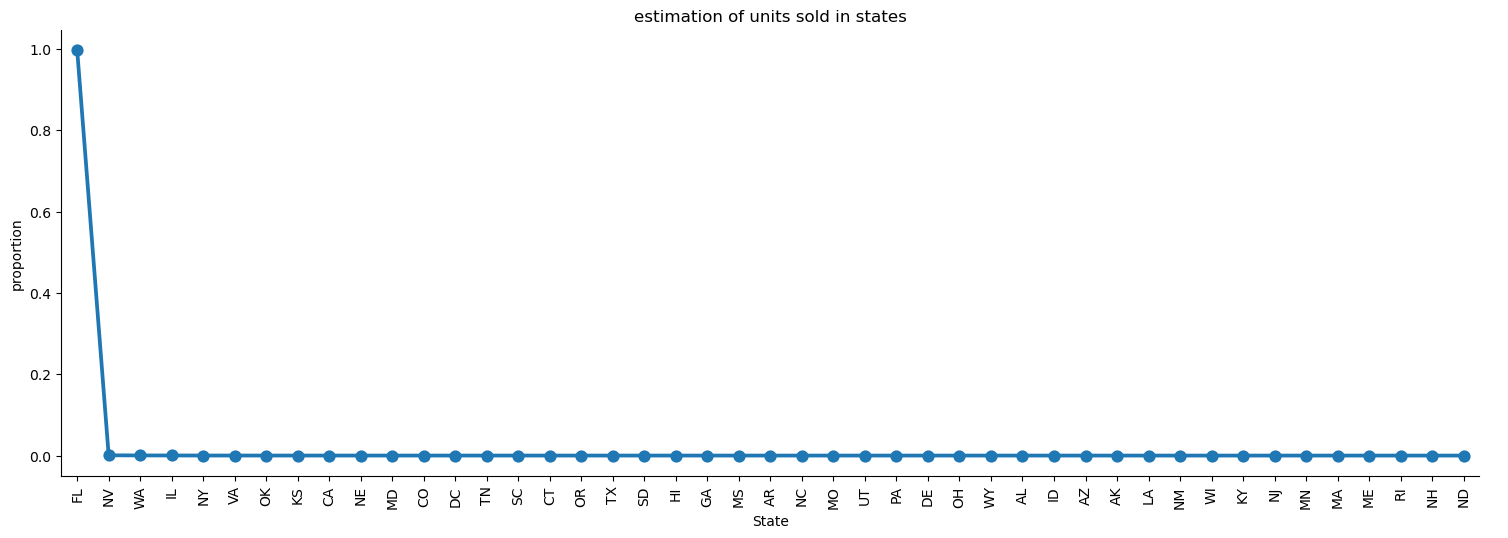

In [23]:

sns.catplot(
    
    kind = "point",
    x = df['State'].unique(),
    y = df['State'].value_counts(normalize=True,),
    aspect=3,
    
)
plt.title(
    "estimation of units sold in states"
)
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.show()

### Animated choropleth plot using plotly.express

In [25]:
tem_df = df.copy(deep=True)
tem_df.drop(tem_df.columns[[0,8,9,11,12,13,15,16]],axis=1,inplace=True)

In [76]:

fig = pl.choropleth(
    tem_df,
    locations = 'State',
    color = "Make",
    hover_name= "County",
    hover_data= ["Electric Range","City","State"],
    locationmode='USA-states',
    animation_frame = "Model Year",
    scope="usa",
)
fig.update_geos(overwrite=True)
fig.show()


## Racing bar plot

In [70]:
df_grouped = df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0).cumsum()

In [71]:
bcr.bar_chart_race( 
    df=df_grouped,
    filename="racing_bar.mp4",
    n_bars=10,  # Number of bars to show
    fixed_order=False,
    fixed_max=True,
    title="Top Electric Vehicle Makes Over the Years",
    steps_per_period=10,
    period_length=500
)
    


C:\Users\JAWAHAR JOVAH\anaconda3\envs\py311\Lib\site-packages\bar_chart_race\_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\JAWAHAR JOVAH\anaconda3\envs\py311\Lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\JAWAHAR JOVAH\anaconda3\envs\py311\Lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\JAWAHAR JOVAH\anaconda3\envs\py311\Lib\site-packages\bar_chart_race\_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`

